In [1]:
import time
from pandas import DataFrame
from numpy import random, nan, ones

T = 30
h = 5
num_free_vars = 40
df_true = DataFrame(random.normal(0,1,[T+h,num_free_vars]))
df_true['one'] = 1 # constant
df_true['sum'] = df_true.iloc[:,:].sum(axis=1)

# constraint in true data
df_true['sum']-df_true.iloc[:,:-1].sum(axis=1)

num_variables = num_free_vars + 2

df = df_true.copy()
df[0].iloc[-h:] = nan
df[1].iloc[-h:] = nan
df['one'].iloc[-h:] = nan
C = ones([1,num_variables])
C[0,-1] = -1
d = 0
C_dict = {}
d_dict = {}
for i in range(T+h):
    C_dict[i] = C
    d_dict[i] = d

lag = 1
Tin = 5
df

/var/folders/j5/td8zgnpj0xvc79yhsnbjr17m0000gn/T/ipykernel_61572/4140181271.py:18: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[0].iloc[-h:] = nan
/var/folders/j5/td8zgnpj0xvc79yhsnbjr17m0000gn/T/ipykernel_61572/4140181271.py:18: Setting

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,one,sum
0,-0.992353,0.323965,-0.302274,-1.585237,-0.544800,-0.000248,-0.021441,0.316169,-0.098997,1.085379,...,-0.888431,-0.119908,0.580787,-0.399038,1.200697,2.305707,0.531889,1.483389,1.0,1.378333
1,1.298005,1.169075,0.078595,0.186472,0.009394,-0.077167,0.935385,-0.559335,0.341219,0.803685,...,-0.879894,1.283240,0.275753,0.412148,-0.494896,2.457624,0.238578,-1.975909,1.0,9.055729
2,-0.786382,-0.463325,0.721203,1.348425,-0.501516,0.488126,1.598850,0.223581,-0.727041,-0.928016,...,-1.998879,0.021455,-0.213586,0.838839,0.124605,-0.246737,-1.024014,0.612363,1.0,-7.889502
3,-2.276180,0.545390,1.035878,-0.755436,0.430923,0.669475,-0.537089,0.515443,0.047906,-1.174832,...,-1.110335,-0.416424,-0.862757,1.326787,0.690854,-0.906616,0.476509,0.699091,1.0,0.072863
4,-1.259395,-1.594934,1.809248,1.002226,-0.815308,1.749017,0.493437,0.433594,-0.762308,0.363637,...,-1.790596,0.929426,0.428156,-0.882503,0.082432,-1.320863,0.693618,1.953759,1.0,2.294877
5,-0.415712,1.443924,-0.920818,2.263012,1.571203,0.744302,-1.402939,-1.623268,2.487828,2.005971,...,-0.068997,-0.620042,2.154509,-1.618542,0.785786,-1.704877,0.118322,0.522214,1.0,-0.051083
6,-0.182928,0.111827,-1.209468,0.021120,-1.185045,0.461112,-1.344325,-2.157952,0.752266,-0.063163,...,-1.309927,-0.206375,1.288428,-1.122680,-0.191745,-0.129728,-0.132934,-0.470554,1.0,1.206534
7,0.641366,-0.289803,0.694779,1.942122,1.372276,-1.522415,-0.673062,0.305787,-0.121505,0.085683,...,0.865407,-0.557632,0.189961,0.819096,0.095489,1.006587,0.793813,0.899724,1.0,10.180246
8,-1.191516,0.576992,-1.643182,-0.131669,0.343353,-1.711821,-0.443054,-0.634584,1.708412,1.385935,...,-0.949156,1.201457,1.199512,-0.423426,-0.421269,0.505954,-1.413370,-0.839522,1.0,-5.540943
9,-2.311907,1.210484,0.801909,0.518531,-0.531715,-0.010624,-0.408591,-1.236370,-0.386644,-0.745807,...,0.290238,-0.467597,0.198447,0.575039,-0.325595,-1.779368,-1.016658,0.899743,1.0,-8.831396


In [2]:
from mff.mff import ax_forecast

In [3]:
start = time.time()
df2,df1,df0aug_coef = ax_forecast(df, lag, Tin, C_dict, d_dict)
end = time.time()
print('time',end-start)

df and C are re-ordered


For variable 0,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('elasticnet',
                                                      ElasticNetCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                                                                   fit_intercept=False,
                                                                   max_iter=500))]),
                           transformer=StandardScaler()) has score: 0.5583539064520213
For variable 0,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('naive',
                                                      NaiveForecaster())]),
                           transformer=StandardScaler()) has score: 0.8743714417941255
For variable 0,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                 

/Users/macair/miniconda3/envs/mff-dev/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/macair/miniconda3/envs/mff-dev/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/Users/macair/miniconda3/envs/mff-dev/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features

For variable 2,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('elasticnet',
                                                      ElasticNetCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                                                                   fit_intercept=False,
                                                                   max_iter=500))]),
                           transformer=StandardScaler()) has score: 0.0
For variable 2,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('naive',
                                                      NaiveForecaster())]),
                           transformer=StandardScaler()) has score: 0.0
For variable 2,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardS

<Axes: >

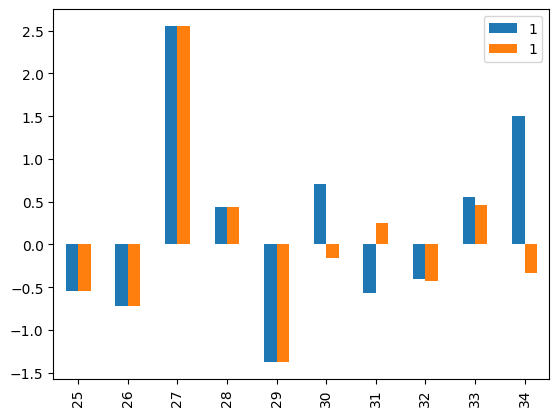

In [ ]:
from pandas import concat

concat([df_true[1], df2[1]], axis=1).tail(10).plot(kind='bar')

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


pipeline_linear_regression = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("PCA", PCA(n_components=0.9)),
        ("linreg", LinearRegression(fit_intercept=False)),
    ]
)

start = time.time()
df2,df1,df0aug_coef = ax_forecast(df, lag, Tin, C_dict, d_dict, estimators=pipeline_linear_regression)
end = time.time()
print('time',end-start)

df and C are re-ordered
For variable 0,  model TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('PCA',
                                                      PCA(n_components=0.9)),
                                                     ('linreg',
                                                      LinearRegression(fit_intercept=False))]),
                           transformer=StandardScaler()) has score: 1.1128241971969381
For variable 0 the best model is TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('PCA',
                                                      PCA(n_components=0.9)),
                                                     ('linreg',
                                                      Lin

<Axes: >

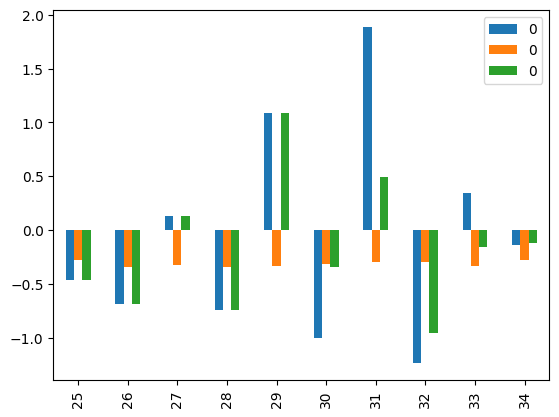

In [7]:
from pandas import concat
var_to_show = 0

concat([df_true[var_to_show], df1[var_to_show], df2[var_to_show]], axis=1).tail(10).plot(kind='bar')